In [69]:
import numpy as np
# import matplotlib.pyplot as plt
# plt.style.useabs

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [70]:
#create feature and target orray of two values.
# The data is stored in one-dimensional NumPy arrays.
xtrain = np.array([1.0,2.0])
ytrain = np.array([300.0,500.0])
print(f"xtrain:{xtrain}")
print(f"ytrain:{ytrain}")

xtrain:[1. 2.]
ytrain:[300. 500.]


In [71]:
# 'm' is no of training examples .
print(f"xtrain.shape:{xtrain.shape}")
m = xtrain.shape[0]
#  or use len(xtrain)
print(f"m is no of training examples:{m}")

xtrain.shape:(2,)
m is no of training examples:2


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below..

In [72]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = xtrain[i]
y_i = ytrain[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


In [73]:
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = xtrain[i]
y_i = ytrain[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


### Plotting data

Here are possible markers
`.` : point marker
`,` : pixel marker
`o` : circle marker
`*` : star marker
`+` : plus marker
`x` : x marker

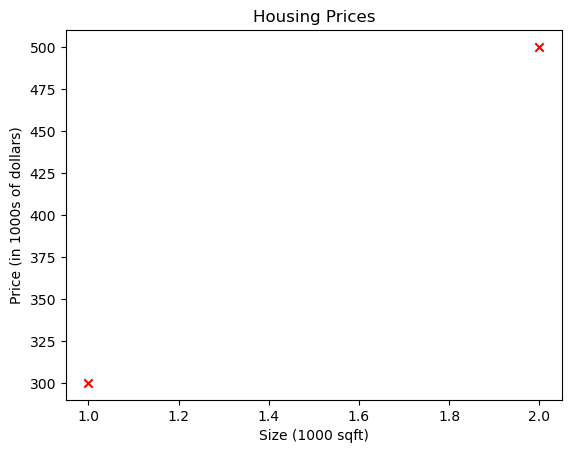

In [74]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(xtrain, ytrain, marker='x', c='r')

# Set the title
plt.title("Housing Prices")

# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

# Display the plot
plt.show()


## Model Function
As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [75]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [76]:
def compute_model_output(x,w,b): 
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples  feature array i/p
      w,b (scalar)    : model parameters  also called coefficients.
    Returns
      y (ndarray (m,)): target values target array.
      f_wb is the y target array that return the output array.
    """
    m = xtrain.shape[0]
    f_wb = np.zeros(m)
    m = xtrain.shape[0]
    for i in range(m):
        f_wb[i] = w*x[i]+b
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

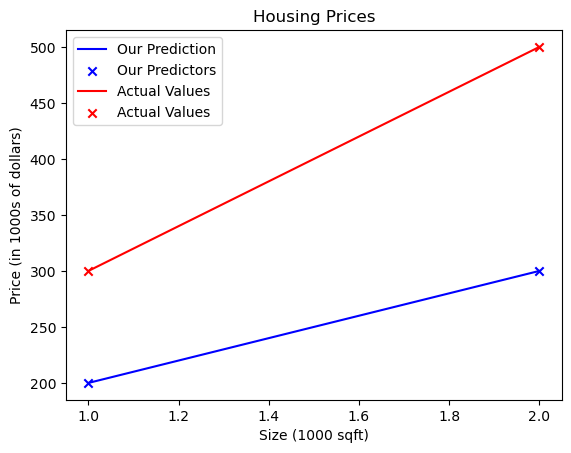

In [77]:
tmp_f_wb = compute_model_output(xtrain, w, b,)
#  plot() used to plot a line 
#  scatter used to plot a scatter plot.
# Plot our model prediction
plt.plot(xtrain, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(xtrain, tmp_f_wb, marker='x', c='b',label='Our Predictors')
# Plot the data points
plt.plot(xtrain, ytrain,  c='r',label='Actual Values')
plt.scatter(xtrain, ytrain, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Lets explore with more values of xtrain, ytrain, w, b

In [94]:
#Lets take more examples 
xtrain = np.array([1, 2, 3, 4, 5])  # Example house sizes in 1000 sqft
ytrain = np.array([300, 500, 700, 900, 1100])  # Example prices in 1000s of dollars
i=0
while i<len(xtrain):
    x_i = xtrain[i]
    y_i = ytrain[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")
    i+=1

(x^(0), y^(0)) = (1, 300)
(x^(1), y^(1)) = (2, 500)
(x^(2), y^(2)) = (3, 700)
(x^(3), y^(3)) = (4, 900)
(x^(4), y^(4)) = (5, 1100)


## PLot new data

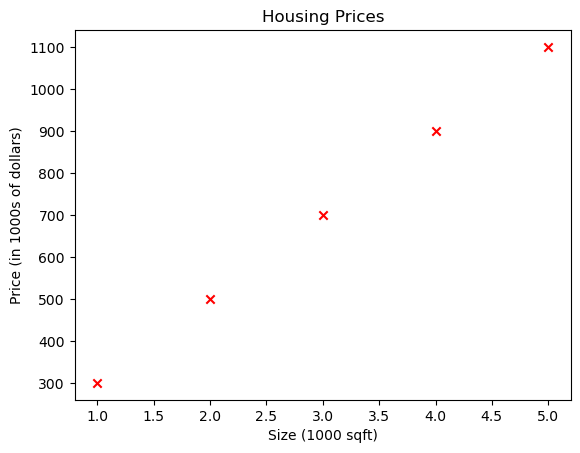

In [95]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(xtrain, ytrain, marker='x', c='r')
# plt.plot(xtrain,ytrain,c='b',label = "Actual Values")
# Set the title
plt.title("Housing Prices")

# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

# Display the plot
plt.show()


# with w = 100,b=100 

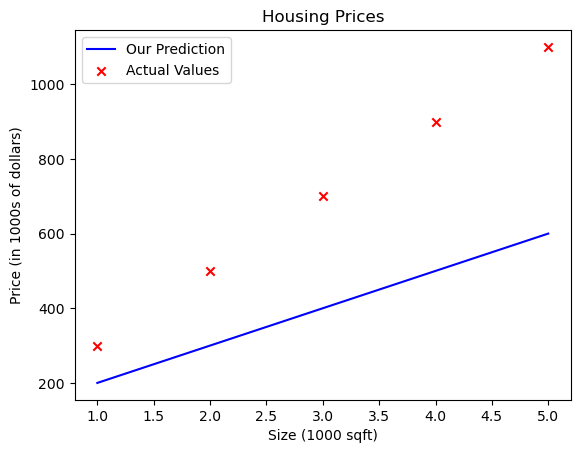

In [96]:
w = 100
b = 100
tmp_f_wb = compute_model_output(xtrain,w,b)
# Plot our model prediction
plt.plot(xtrain, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(xtrain, ytrain, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# with w = 200,b=100 

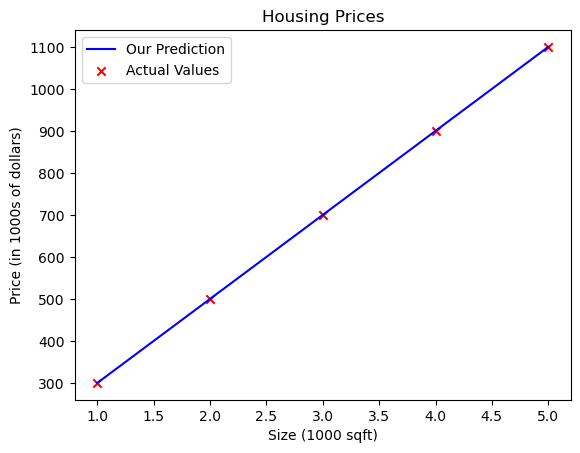

In [97]:
w = 200
b = 100
tmp_f_wb = compute_model_output(xtrain,w,b)
# Plot our model prediction
plt.plot(xtrain, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(xtrain, ytrain, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# with w = 300,b=100 

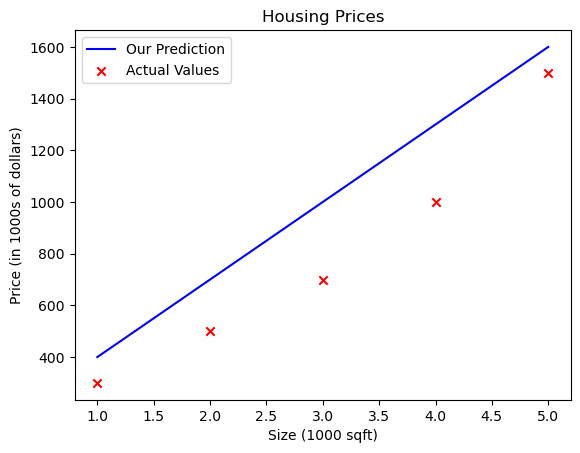

In [93]:
w = 300
b = 100
tmp_f_wb = compute_model_output(xtrain,w,b)
# Plot our model prediction
plt.plot(xtrain, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(xtrain, ytrain, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## hence at w=200 and b=100 the model perfectly fits given data

In [98]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.